In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
import ot 

import sys
sys.path.append("../src")
from utility import HCP,IPRHCP,PRHCP

In [10]:
d = 4
N = [10,100,1000,10000,100000]
L = len(N)
np.random.seed(42)
n = 0

w = np.zeros((L,5))
hcp = np.zeros((L,5))
sw = np.zeros((L,5))
iprhcp = np.zeros((L,5))
prhcp = np.zeros((L,5))


for l in N:

    a = np.ones(l)/l
    b = np.ones(l)/l
    
    for i in range(5):
        x = np.random.rand(l,d)
        y = np.random.rand(l,d) + 1

        # SW
        t = time.time()
        tt = ot.sliced.sliced_wasserstein_distance(x, y, seed=2022) 
        sw[n,i] = time.time()-t

        # EMD
        if l<20000:
            t = time.time()
            M = ot.dist(x,y)
            tt = np.sqrt(ot.emd2(a,b,M))
            w[n,i] = time.time()-t

        # HPD
        t = time.time()
        tt = HCP(x,y)
        hcp[n,i] = time.time()-t

        # IPRHCP
        t = time.time()
        tt = IPRHCP(x,y)
        iprhcp[n,i] = time.time()-t

        # PRHPD
        t = time.time()
        tt = PRHCP(x,y)
        prhcp[n,i] = time.time()-t

    n += 1


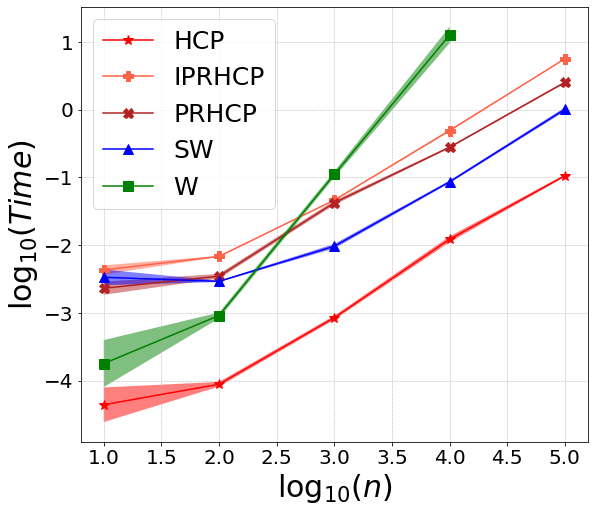

In [15]:
plt.figure(figsize=(20,8))
ss = 1
plot_lines = []
plt.subplot(1,2,1)

plt.plot(np.log10(np.array(N)),(np.mean(np.log10(hcp),1)),c='r',label='HCP',marker='*',markersize=10)
plt.fill_between(np.log10(np.array(N)),(np.mean(np.log10(hcp),1))-(np.std(np.log10(hcp),1))/ss,(np.mean(np.log10(hcp),1))+(np.std(np.log10(hcp),1))/ss,facecolor='r',alpha=0.5)
plt.plot(np.log10(np.array(N)),(np.mean(np.log10(iprhcp),1)),c='tomato',label='IPRHCP',marker='P',markersize=10)
plt.fill_between(np.log10(np.array(N)),(np.mean(np.log10(iprhcp),1))-(np.std(np.log10(iprhcp),1))/ss,(np.mean(np.log10(iprhcp),1))+(np.std(np.log10(iprhcp),1))/ss,facecolor='tomato',alpha=0.5)
plt.plot(np.log10(np.array(N)),(np.mean(np.log10(prhcp),1)),c='firebrick',label='PRHCP',marker='X',markersize=10)
plt.fill_between(np.log10(np.array(N)),(np.mean(np.log10(prhcp),1))-(np.std(np.log10(prhcp),1))/ss,(np.mean(np.log10(prhcp),1))+(np.std(np.log10(prhcp),1))/ss,facecolor='firebrick',alpha=0.5)
plt.plot(np.log10(np.array(N)),(np.mean(np.log10(sw),1)),c='b',label='SW',marker='^',markersize=10)
plt.fill_between(np.log10(np.array(N)),(np.mean(np.log10(sw),1))-(np.std(np.log10(sw),1))/ss,(np.mean(np.log10(sw),1))+(np.std(np.log10(sw),1))/ss,facecolor='b',alpha=0.5)
plt.plot(np.log10(np.array(N))[:-1],(np.mean(np.log10(w[:-1,:]),1)),c='g',label='W',marker='s',markersize=10)
plt.fill_between(np.log10(np.array(N))[:-1],(np.mean(np.log10(w[:-1,:]),1))-(np.std(np.log10(w[:-1,:]),1))/ss,(np.mean(np.log10(w[:-1,:]),1))+(np.std(np.log10(w[:-1,:]),1))/ss,facecolor='g',alpha=0.5)

plt.xlabel('$\log_{10}(n)$',fontsize=30)
plt.ylabel('$\log_{10}(Time)$',fontsize=30)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25)